In [21]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the CSV data
data = pd.read_csv('excel/results_with_env.csv')
data.head()


# Define the predictors and the target variable
predictors = ["NOU", "N", "FJ", "M", "EG", "NU", "K", "O", "all", "T", "P", "FG", "C", "FP", "H", "MU", "F", "G", "E",
              "S", "Q", "L", "GM", "B", "KO", "J", "D"]
target = "GC"

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.2, random_state=42)

# Standardize the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Lasso model
lasso = LassoCV(cv=5, random_state=0).fit(X_train_scaled, y_train)
# Get the coefficients of the model
coefficients = pd.DataFrame({"Feature": predictors, "Coefficient": lasso.coef_})

# Filter out the features with zero coefficient (not important for the model)
important_features = coefficients[coefficients["Coefficient"] != 0]

# Display the important features
important_features


,Feature,Coefficient
0,NOU,0.032424
2,FJ,1.392696
4,EG,0.715292
5,NU,1.007443
6,K,0.082008
8,all,-0.222030
9,T,0.217240
10,P,-1.214878
12,C,-2.640884
13,FP,0.539064


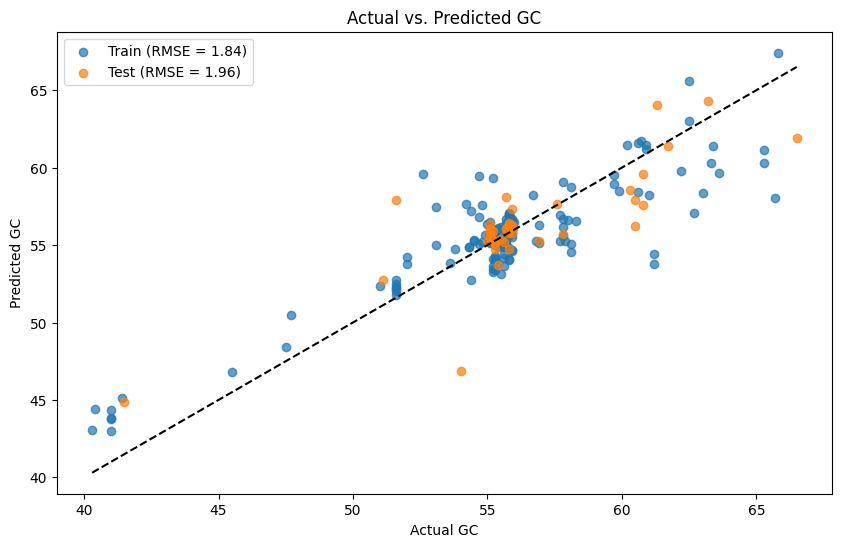

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Use the model to make predictions
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

# Calculate the root mean squared error for the training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Create a scatter plot of the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label='Train (RMSE = {:.2f})'.format(rmse_train), alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Test (RMSE = {:.2f})'.format(rmse_test), alpha=0.7)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 'k--')
plt.xlabel('Actual GC')
plt.ylabel('Predicted GC')
plt.title('Actual vs. Predicted GC')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import r2_score

# Calculate the R^2 score for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

r2_train, r2_test


(0.7788979185014238, 0.6682726201025133)

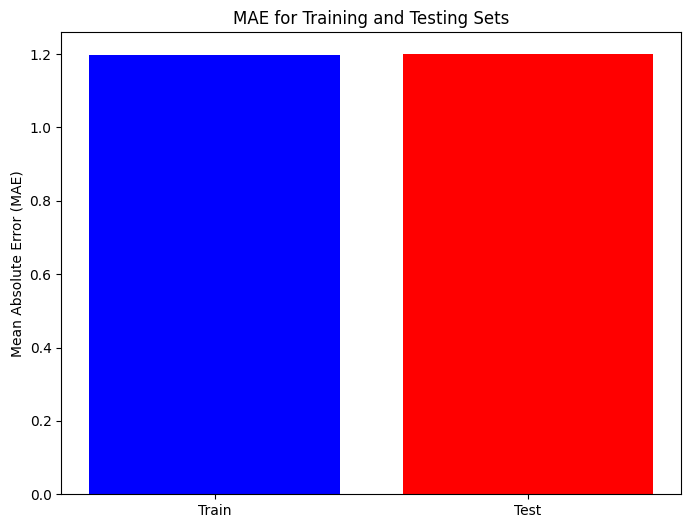

(1.1976395444572494, 1.1996286157423168)

In [24]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE) for the training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Create a bar plot for MAE
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [mae_train, mae_test], color=['blue', 'red'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Training and Testing Sets')
plt.show()

mae_train, mae_test


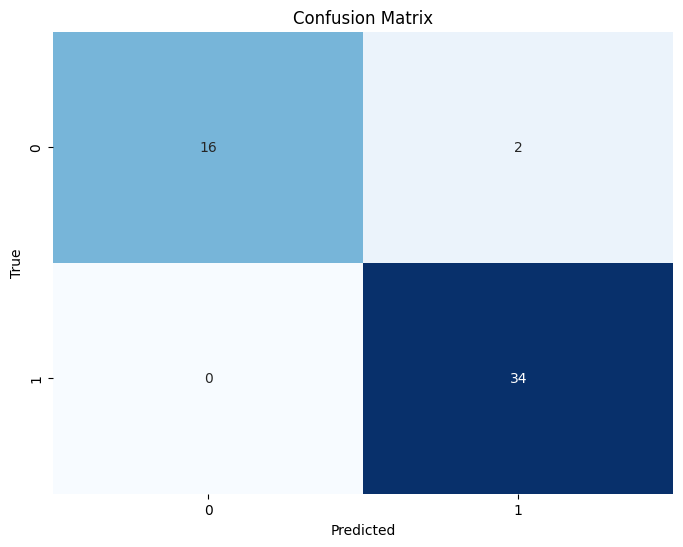

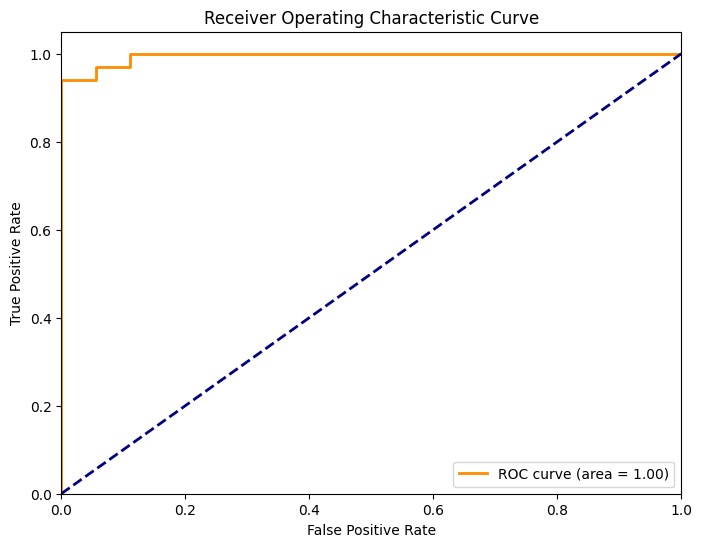

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import pandas as pd

# Load the data
data = pd.read_csv('excel/results_with_env.csv')

# Show the first few rows
data.head()
# Preprocess the data
data['group2'] = data['group2'].apply(lambda x: 1 if x == 'homo' else 0)

# Show the first few rows
data.head()


# Split the data into features and target
X = data.drop(columns=['sample', 'group1', 'group2'])
y = data['group2']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy, report
from sklearn.metrics import roc_curve, auc

# Compute the probabilities of the positive class
y_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


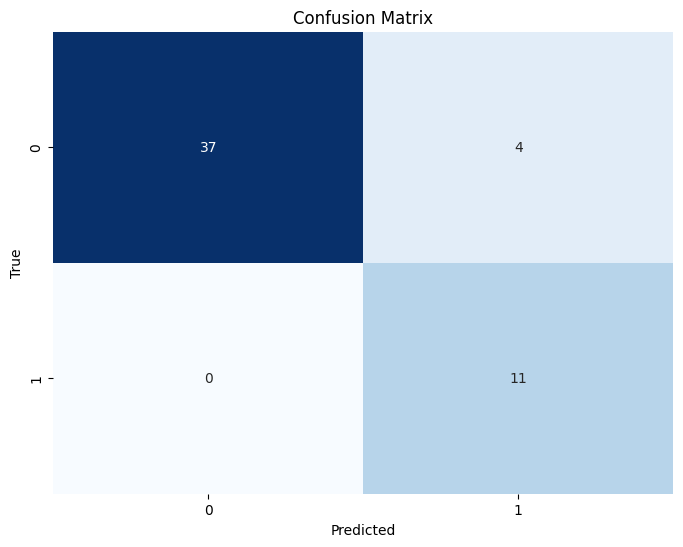

(0.9230769230769231,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.90      0.95        41\n           1       0.73      1.00      0.85        11\n\n    accuracy                           0.92        52\n   macro avg       0.87      0.95      0.90        52\nweighted avg       0.94      0.92      0.93        52\n')

In [33]:
# Split the data into features and target
X = data.drop(columns=['sample', 'group2', 'group1'])
y = data['group1']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy, report


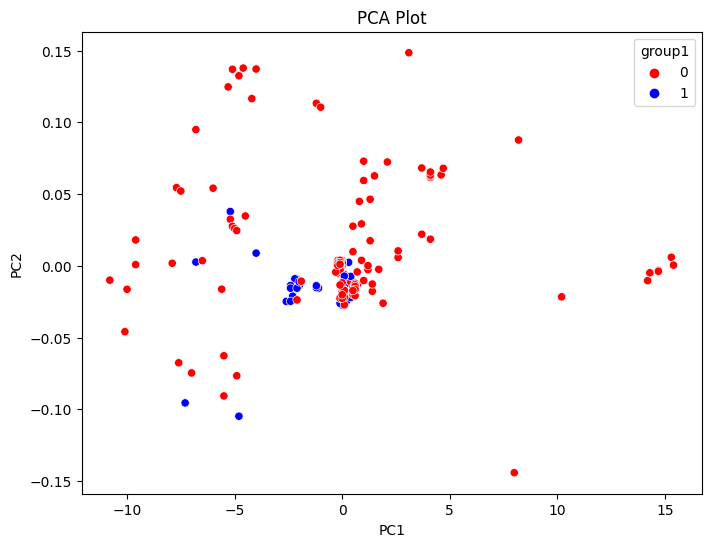

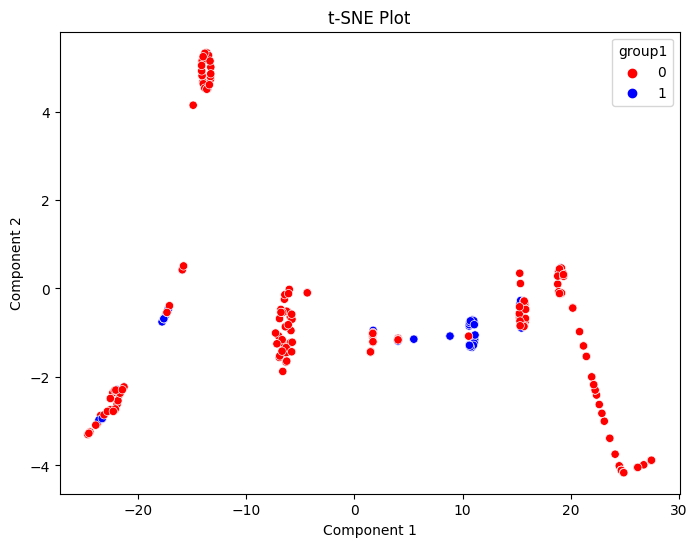

In [34]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['red', 'blue'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the first two components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=['red', 'blue'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Plot')
plt.show()


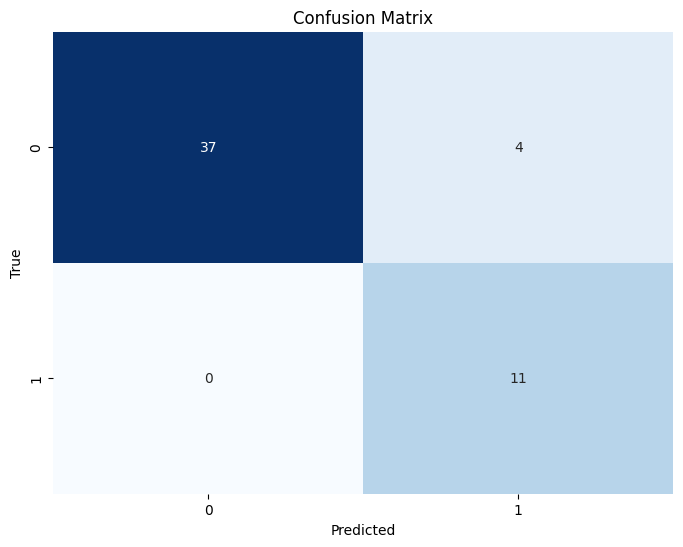

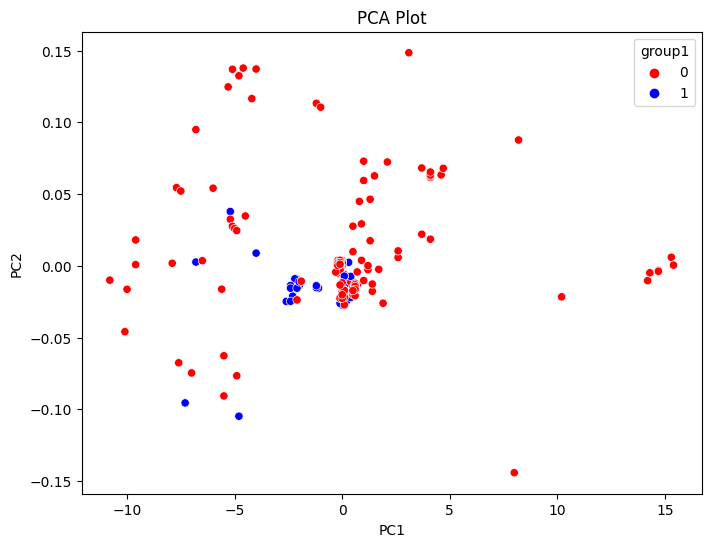

In [35]:
# Reload the data
data = pd.read_csv('excel/results_with_env.csv')

# Preprocess the 'group1' column
data['group1'] = data['group1'].apply(lambda x: 1 if x in ['gut', 'feces'] else 0)

# Show the first few rows
data.head()
# Split the data into features and target
X = data.drop(columns=['sample', 'group2', 'group1'])
y = data['group1']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

accuracy, report
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['red', 'blue'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

